# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

#### <b>[실습프로세스]<b>

1. k-means 군집분석
2. 프로파일링

---------------------------------------------------------------------------------------------
# **1. k-means 모델(군집 분석)**

**k-means 모델이란?**
 > **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

## **(1) 데이터 불러오기**

In [75]:
# 필요 라이브러리 로딩

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as spst
# mosaic
from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings(action='ignore')

In [77]:
# 사전준비 시각화 함수들
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    
    sns.barplot(x = feature, y = target, data = df ,palette = 'RdYlBu')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()

    '''
    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])# i가 0, 1, 2,...로 증가하는데, 이 인덱스가 feature의 실제 고유값과 일치하지 않을 수 있음
    '''
    #feature 컬럼의 실제 고유값을 사용하여 그룹을 생성
    unique_vals = df[feature].unique()
    an_list = [df.loc[df[feature] == val, target].dropna() for val in unique_vals]  # 결측치 처리 추가

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

def mosaic_plot(df, feature, target, cmap='Pastel1'):
    # crosstab으로 데이터 생성
    data = pd.crosstab(df[feature], df[target]).stack()

    # feature 값별로 색상을 통일하고 target 값에 따라 채도만 다르게 설정
    unique_features = df[feature].unique()
    colors = sns.color_palette(cmap, len(unique_features))
    color_dict = {val: colors[i] for i, val in enumerate(unique_features)}
    
    # props 설정
    props = {}
    for idx in data.index:
        feature_val, target_val = idx
        base_color = color_dict[feature_val]
        props[idx] = {'color': base_color}

    # Mosaic plot 생성
    fig, ax = plt.subplots(figsize=(8, 6))
    mosaic(data, properties=props, ax=ax)

    # 구분 선을 진한 검은색으로 설정
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    plt.title(f"Mosaic Plot of {feature} vs {target}")
    plt.show()




def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    plt.rcParams['font.family'] = 'Malgun Gothic'
    mosaic_plot(df,feature,target)
    #plt.axhline(1- df[target].mean(), color = 'r')
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])
    
    
    
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()

In [79]:
# 한글 세팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

# 지수표현(소수점 2자리까지 나타내기)
pd.options.display.float_format = '{:.2f}'.format

In [81]:
# [문제 1] 스케일링 한 데이터 불러오기
# 1. data 변수에 'data_sc.csv' 파일을 불러와서 할당
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('data_sc.csv')
data.head()

,AGE,고용상태,교육수준,상품타입,거주지사이즈,자동차,Willingness to pay/Stay,소득,월 납입액,타 상품 보유 현황,총지불금액
0,-0.07,-1.30,-0.37,-0.31,-0.34,-0.32,-0.81,-1.24,-0.47,-1.08,0.27
1,-1.85,0.77,-0.37,-0.31,-0.34,-0.32,-0.33,1.51,-0.47,1.41,-1.34
2,-0.96,-1.30,-0.37,-0.31,-0.34,-0.32,-0.50,-0.65,-0.94,1.41,-0.48
3,1.71,0.77,-0.37,3.19,2.94,-0.32,0.60,0.14,0.23,-0.25,2.03
4,0.82,0.77,2.73,-0.31,-0.34,-0.32,0.12,-0.52,0.47,0.58,1.15


## **(2) 군집분석**

<b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

### <b>**1) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

* yellowBrick : Scikit-Learn API를 확장하여 모델 선택 및 하이퍼 매개 변수 튜닝을 더 쉽게 만들어 주는 라이브러리
<br>--> 오즈의 마법사의 소설에서 노란 벽돌의 길이 주인공이 에메랄드 시티의 목적지에 도달하기 위해 반드시 가야하는 길로 묘사되었는데 이게 yellowbrick 이다.

In [87]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

!pip install yellowbrick

In [88]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### <b>**2) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [90]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고2024 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k에 할당)
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_1 = KMeans(n_clusters=k, random_state=2024,n_init=10)

#3. 스케일링 된 데이터에 학습

model_1.fit(data)


KMeans(n_clusters=3, n_init=10, random_state=2024)

In [91]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

model_1.cluster_centers_

array([[ 4.91209295e-01, -1.86052996e-02,  3.14947262e-02,
         3.83716786e-01, -9.56484995e-03,  2.78122449e+00,
         9.62935389e-01, -9.89694590e-02,  1.96321817e+00,
         5.53879550e-04,  1.32727947e+00],
       [-1.16286759e-01, -1.29462185e+00, -1.20482237e-01,
        -4.47996867e-02,  3.38287635e-02, -3.16050607e-01,
        -1.44261461e-01, -1.02606888e+00, -1.98651027e-01,
        -4.09022980e-03,  2.58464247e-01],
       [-1.79328857e-02,  7.72119935e-01,  6.59720852e-02,
        -4.13497939e-02, -1.83956795e-02, -3.04852679e-01,
        -8.48604407e-02,  6.26869027e-01, -2.29706328e-01,
         2.33093702e-03, -3.88547151e-01]])

- Kmeans객체는 각 군집을 구성하는 단어 피처가 군집의 중심(Centroid)을 기준으로 얼마나 가깝게 위치해 있는지 cluster_centers_라는 속성으로 제공합니다.
- 3개의 클러스터에 각 군집 중심점의 좌표를 확인할 수 있습니다.
- cluster_centers_는 배열 값으로 제공되며, 행은 개별 군집을, 열은 개별 피처를 의미합니다.
- 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값입니다. 예를 들어 cluster_centers[0,1]은 0번 군집에서 두 번째 피처의 위치 값입니다.

In [93]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))

print(model_1.inertia_)
print(model_1.score(data))

93559.46685236385
-93559.46685236385


- KMeans 클래스는 n_init번 실행하여 이너셔가 가장 낮은 모델을 리턴합니다.
- 하지만 마냥 이니셔가 낮다고 좋은 모델일까요?
- k가 늘어날 수록 이너셔는 점점 작아지기 때문에 이너셔가 그다지 좋은 성능 지표가 아니라는 걸 알 수 있습니다.
- 어차피 클러스터가 늘어날 수록 각각의 데이터는 가까운 센트로이드에 가까워지기 때문에 이너셔가 작아지는 건 당연한 결과입니다.
- 그걸 파악하기 위해서 한번 k값에 따라 이니셔가 어떻게 변하는지 확인해 보시죠.

<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!

In [96]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)
k1= 5 

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_2 = KMeans(n_clusters=k1, random_state=2024,n_init=10)

#3. 스케일링 된 데이터에 학습
model_2.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기
print(model_2.inertia_)
print(model_2.score(data))


74062.29216676278
-74062.29216676278


In [97]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

k2= 7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_3 = KMeans(n_clusters=k2, random_state=2024,n_init=10)

#3. 스케일링 된 데이터에 학습

model_3.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기
print(model_3.inertia_)
print(model_3.score(data))


60258.67316591433
-60258.673165914326


In [98]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)

k3=9

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_4 =KMeans(n_clusters=k3, random_state=2024,n_init=10)

#3. 스케일링 된 데이터에 학습

model_4.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_4.inertia_)
print(model_4.score(data))


54032.649885030754
-54032.649885030754


-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

n_cluster:3, inertia:93559.46685236385
---------
n_cluster:4, inertia:83454.74686785726
---------
n_cluster:5, inertia:74062.29216676278
---------
n_cluster:6, inertia:66665.31836457558
---------
n_cluster:7, inertia:60258.673165914326
---------
n_cluster:8, inertia:57165.86111937334
---------
n_cluster:9, inertia:54032.649885030754
---------
n_cluster:10, inertia:51605.49259624536
---------
n_cluster:11, inertia:49003.46504445409
---------
n_cluster:12, inertia:46646.2428745423
---------
n_cluster:13, inertia:44855.61546752569
---------
n_cluster:14, inertia:44029.05451524028
---------
n_cluster:15, inertia:42417.61942392138
---------
n_cluster:16, inertia:41000.00802264157
---------
n_cluster:17, inertia:40010.32379731119
---------
n_cluster:18, inertia:38614.55611441418
---------
n_cluster:19, inertia:37671.500691281384
---------


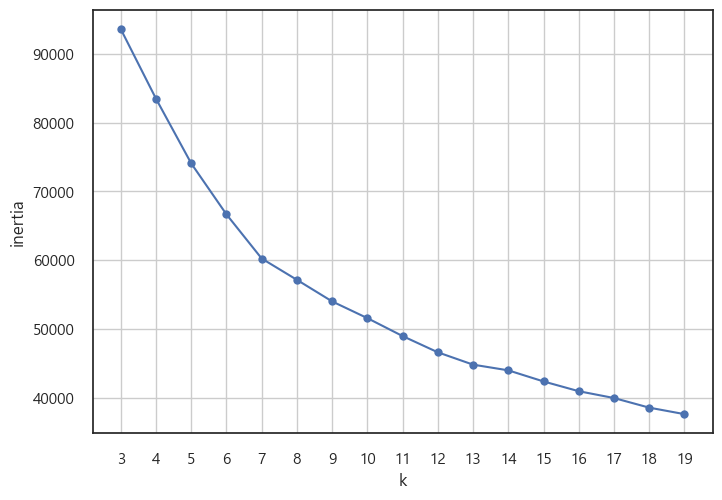

In [101]:
#[문제 6] for 문을 활용해서 2~20까지 k값을 넣어서 성능지표 확인하기

ks= range(3,20)         # k값 범위 지정(range(3,20)) 후 ks 변수에 할당
inertias =[]   # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

for k in ks  : # for문 활용
    model = KMeans(n_clusters=k, random_state=2024,n_init=10)            # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
    model.fit(data)                    # 모델 학습 & 학습에 소요되는 시간 측정(%time 활용)
    #inertias.append(model.score(data))                    # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    inertias.append(model.inertia_)  
    print('n_cluster:{}, inertia:{}'.format(k, model.inertia_))
    print('---------') # n_cluster, inertia 결과 출력


plt.Figure(figsize=(15,6))
plt.plot(ks,inertias,'-o') # '-o'는 실선과 원을 같이 시각화
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

여기서는 확실하게 어떤 k 값이 좋은지 파악하기가 힘들긴 하네요

### <b>**3) [참조]Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

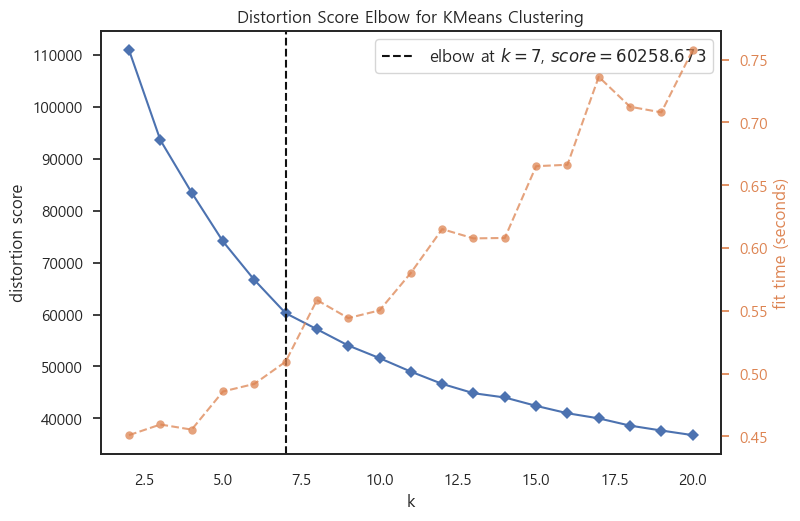

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2024, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state=2024,n_init=10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(2,21)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E,k=(2,21))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)

Elbow_M.show()

- 위 그림에서 보듯이
k=6까지는 빠르게 이너셔가 감소하는걸 확인할 수 있습니다. 이 지점을 Elbow라 칭하는데,
- 보통 이 지점을 넘어서면 이너셔가 줄어드는 속도가 매우 줄어들기 때문에
- 6를 넘어선 클러스터의 개수는 크게 도움이 되지 않습니다. 따라서 보통 이 Elbow를 최적의 클러스터 개수로 고르게 됩니다.

- (참고) 그러나 방금과 같은 방법은 조금은 엉성하게 느껴지기도 합니다. 더 정확한 방법은 실루엣 점수(silghouette score)입니다.
 sklearn의 silhouette_score() 함수를 사용합니다.

 - from sklearn.metrics import silhouette_score
- silhouette_score(X, kmeans.labels_)

https://box-world.tistory.com/62

### <b>**4) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [107]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다
# data0 라는 변수에 할당하기
data0 = pd.read_csv('customers_seg.csv')

# 2. 'CID'는 활용하지 않을 예정으로 삭제합니다.
data0.drop(columns ='CID' , inplace = True)

# 3. 데이터 상위 5개 확인하기
data0.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [108]:
data.head()

,AGE,고용상태,교육수준,상품타입,거주지사이즈,자동차,Willingness to pay/Stay,소득,월 납입액,타 상품 보유 현황,총지불금액
0,-0.07,-1.30,-0.37,-0.31,-0.34,-0.32,-0.81,-1.24,-0.47,-1.08,0.27
1,-1.85,0.77,-0.37,-0.31,-0.34,-0.32,-0.33,1.51,-0.47,1.41,-1.34
2,-0.96,-1.30,-0.37,-0.31,-0.34,-0.32,-0.50,-0.65,-0.94,1.41,-0.48
3,1.71,0.77,-0.37,3.19,2.94,-0.32,0.60,0.14,0.23,-0.25,2.03
4,0.82,0.77,2.73,-0.31,-0.34,-0.32,0.12,-0.52,0.47,0.58,1.15


In [109]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4= 6 

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters=k4, random_state=2024,n_init=10)

#3. 스케일링 된 데이터에 학습
model_B.fit(data)


#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(.predict)

cluster =model_B.predict(data) # 클러스터링 된 데이터들을 가지고 분류생성

In [110]:
cluster

array([3, 1, 3, ..., 3, 4, 3])

In [111]:
# [문제 10] 예측결과와 원본 데이터 합치기

#1. 예측 결과를 데이터프레임으로 만들고

cluster = pd.DataFrame(cluster, columns = ['cluster'])


#2. 원본 데이터와 합쳐서, result로 저장

result = pd.concat( [data0 , cluster] ,axis = 1)

#3. 예측 결과는 카테고리 타입으로 변경
result['cluster'] = pd.Categorical(result['cluster'] )
result.head()

#4. 결과 저장
result.to_csv('data_cluster.csv', index=False)



In [112]:
check = pd.read_csv('data_cluster.csv')
check.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,cluster
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,...,80,0,1,자주방문,없음,자사영업,631000,일반세단,소,3
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,...,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,1
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,...,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중,3
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,...,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,0
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,...,120,0,3,비방문,없음,대리점,947000,SUV,중,2


<b> 각 고객별로 군집 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

* 이제부터 조별 과제를 수행합니다.
    * 조 내에서 최적의 K값으로 군집을 수행한 결과(result)를 하나 선정해서
    * 모든 조원들이 동일한 데이터를 로딩하고
    * 프로파일링을 시작합니다.


---------------------------------------------------------------------------------------------
# **2. 프로파일링**

<b>프로파일링 이란?
> <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

<font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>* 범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다
  <br>* 개인별로 약 6개의 변수에 대한 군집간 차이 분석(하나의 변수당 2명이상이 분석 수행)

* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

## **(1) 컬럼 확인해보기**

In [187]:
#[문제 12] result에 대해 info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인
# 1. 데이터 불러오기(조에서 하나의 결과를 선정해서 공유)
# 찬울님의 군집이 가장 잘 분류되었습니다 
result=pd.read_csv('result_final(real).csv')
# 2. info로 확인하기
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

<b>cluster 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1) AGE**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
AGE,,,,,,,,,,,,,,,,,,
1,14,0,0,1090,132,81,137,0,1454,0.03,0.00,0.00,0.63,0.15,0.08,0.14,0.00,0.12
2,38,0,506,630,123,104,136,1,1538,0.08,0.00,0.15,0.37,0.14,0.11,0.14,0.00,0.13
3,165,543,2434,0,308,349,456,520,4775,0.36,0.33,0.74,0.00,0.34,0.36,0.46,0.26,0.40
4,91,883,363,0,284,226,219,1058,3124,0.20,0.53,0.11,0.00,0.32,0.23,0.22,0.53,0.26
5,117,235,0,0,48,202,54,401,1057,0.26,0.14,0.00,0.00,0.05,0.21,0.05,0.20,0.09
6,29,11,0,0,0,11,0,1,52,0.06,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


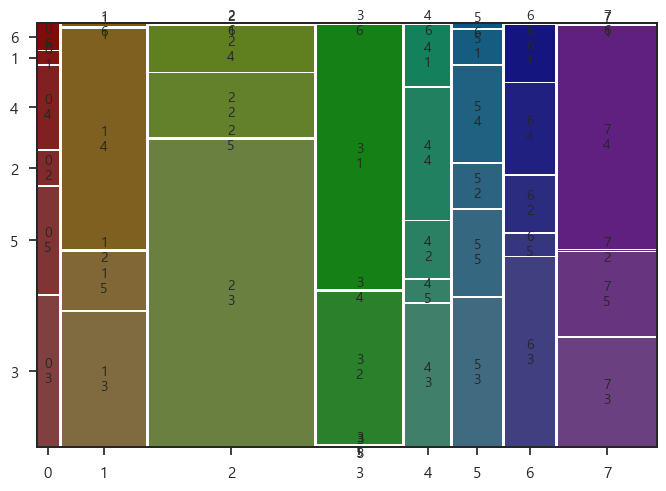

In [192]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

feature = 'AGE'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [195]:
#[같이 하기]
# 1 : 20대
# 2 : 30대 
# 3 : 40대 
# 4 : 50대 
# 5 : 60대
# 6 : 70대


### **2) 등록(계/피)**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
등록(계/피),,,,,,,,,,,,,,,,,,
계약자,359,1314,2620,1338,713,762,792,1527,9425,0.79,0.79,0.79,0.78,0.80,0.78,0.79,0.77,0.79
피보험자,95,358,683,382,182,211,210,454,2575,0.21,0.21,0.21,0.22,0.20,0.22,0.21,0.23,0.21
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


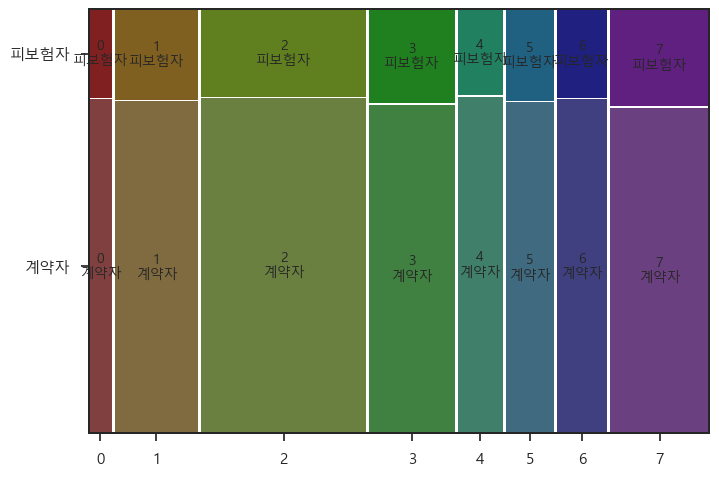

In [198]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '등록(계/피)'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **3) 성별**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
성별,,,,,,,,,,,,,,,,,,
0,210,863,1654,894,475,493,548,1012,6149,0.46,0.52,0.50,0.52,0.53,0.51,0.55,0.51,0.51
1,244,809,1649,826,420,480,454,969,5851,0.54,0.48,0.50,0.48,0.47,0.49,0.45,0.49,0.49
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


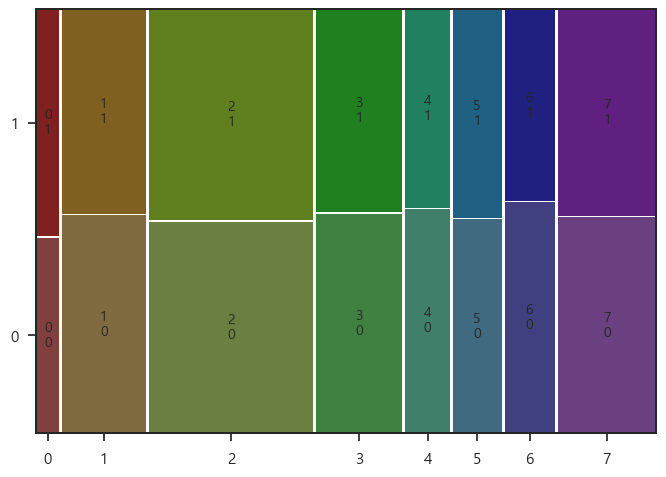

In [203]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '성별'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()


<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **4) willingness to pay/stay(수치)**

Willingness to pay/Stay                  
                            max  min  mean median
cluster                                          
0                         92.50 6.54 18.96  15.63
1                         12.89 2.51  4.98   3.92
2                         49.69 2.05  7.86   5.74
3                         53.21 2.47  8.20   6.18
4                         47.76 2.44  8.56   6.08
5                         75.38 3.52 11.91   9.42
6                         51.74 2.09  7.80   5.86
7                         54.86 4.80 11.22   8.24

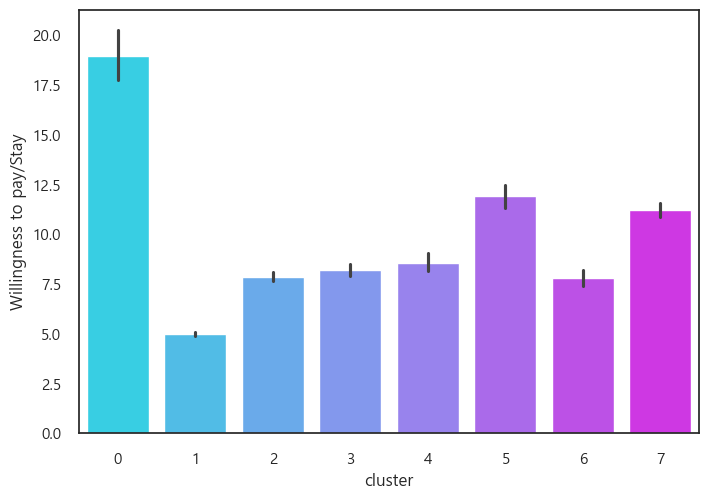

In [208]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = 'Willingness to pay/Stay'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()


<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [210]:
# [같이 하기]


### **5) 상품 타입**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
상품타입,,,,,,,,,,,,,,,,,,
고급,64,0,0,1,34,973,3,0,1075,0.14,0.00,0.00,0.00,0.04,1.00,0.00,0.00,0.09
기본,249,1133,2201,1209,580,0,636,1270,7278,0.55,0.68,0.67,0.70,0.65,0.00,0.64,0.64,0.61
중급,141,539,1102,510,281,0,363,711,3647,0.31,0.32,0.33,0.30,0.31,0.00,0.36,0.36,0.30
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


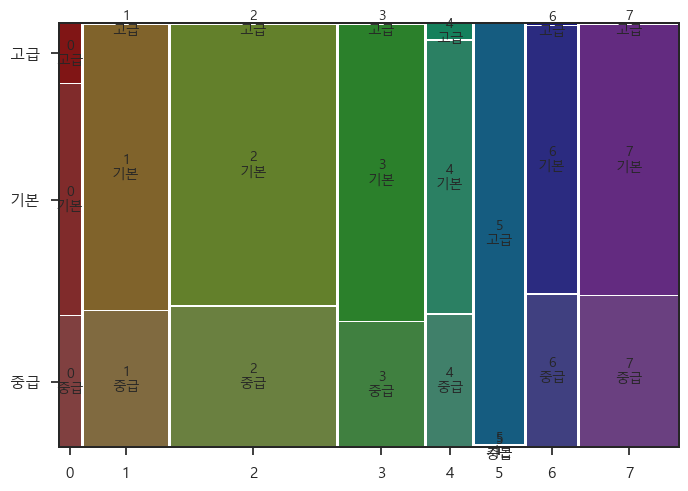

In [214]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '상품타입'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()



<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **6) 교육수준**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
교육수준,,,,,,,,,,,,,,,,,,
고졸이하,148,455,1120,527,0,319,343,565,3477,0.33,0.27,0.34,0.31,0.00,0.33,0.34,0.28,0.29
대학졸업,263,1128,2080,1097,0,584,619,1334,7105,0.58,0.68,0.63,0.64,0.00,0.60,0.62,0.67,0.59
박사,9,89,103,96,0,20,40,82,439,0.02,0.05,0.03,0.06,0.00,0.02,0.04,0.04,0.04
석사,34,0,0,0,895,50,0,0,979,0.07,0.00,0.00,0.00,1.00,0.05,0.00,0.00,0.08
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


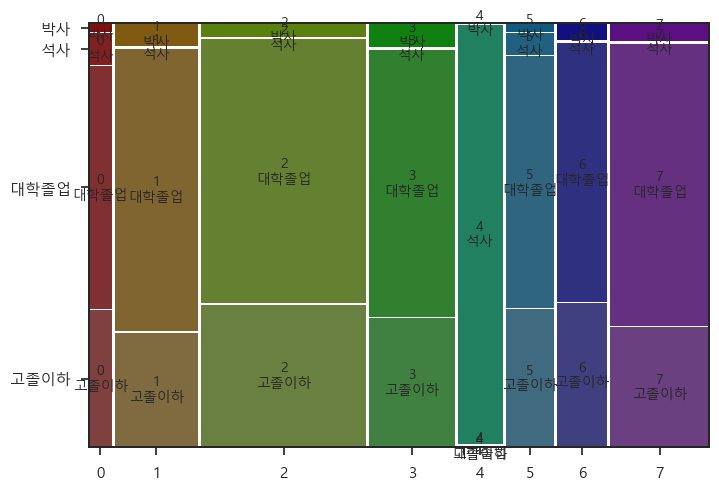

In [219]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '교육수준'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **7) 고용상태**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
고용상태,,,,,,,,,,,,,,,,,,
FALSE,9,0,281,0,27,6,37,0,360,0.02,0.00,0.09,0.00,0.03,0.01,0.04,0.00,0.03
고용,295,1672,0,1720,673,616,561,1981,7518,0.65,1.00,0.00,1.00,0.75,0.63,0.56,1.00,0.63
무직,115,0,2265,0,115,247,286,0,3028,0.25,0.00,0.69,0.00,0.13,0.25,0.28,0.00,0.25
휴직,35,0,757,0,80,104,118,0,1094,0.08,0.00,0.23,0.00,0.09,0.11,0.12,0.00,0.09
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


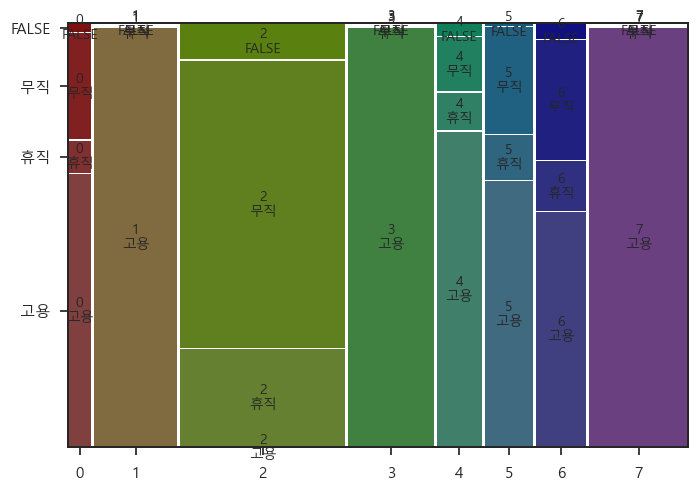

In [224]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '고용상태'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **8) 소득(수치)**

소득                                    
               max       min         mean       median
cluster                                               
0        130366500         0  45553981.28  45102000.00
1        101247300  24121000  53940531.04  52707000.00
2         39601100         0   7923727.37         0.00
3        132020900  82386000 101686109.59 100632300.00
4        131727200         0  55495026.26  53241000.00
5        128243500         0  46602401.23  43333000.00
6        129646000         0  43725545.31  35271000.00
7        102214000  24045000  53629997.73  52226000.00

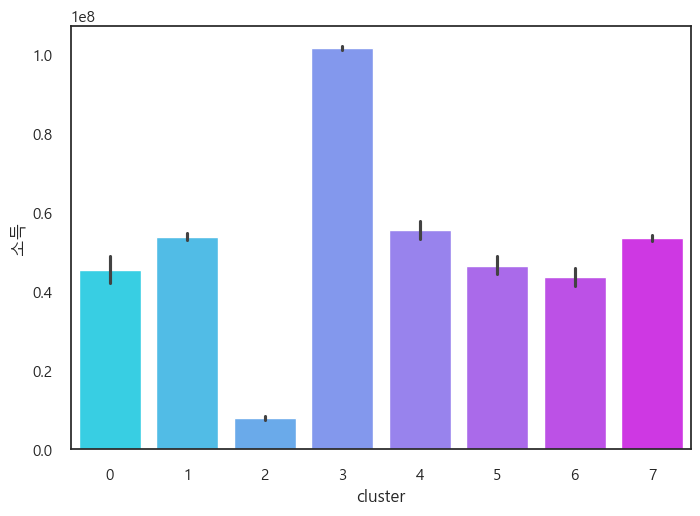

In [228]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '소득'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **9) 결혼여부**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
결혼여부,,,,,,,,,,,,,,,,,,
기혼,242,1122,1322,1160,563,569,630,1349,6957,0.53,0.67,0.40,0.67,0.63,0.58,0.63,0.68,0.58
미혼,212,550,1981,560,332,404,372,632,5043,0.47,0.33,0.60,0.33,0.37,0.41,0.37,0.32,0.42
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


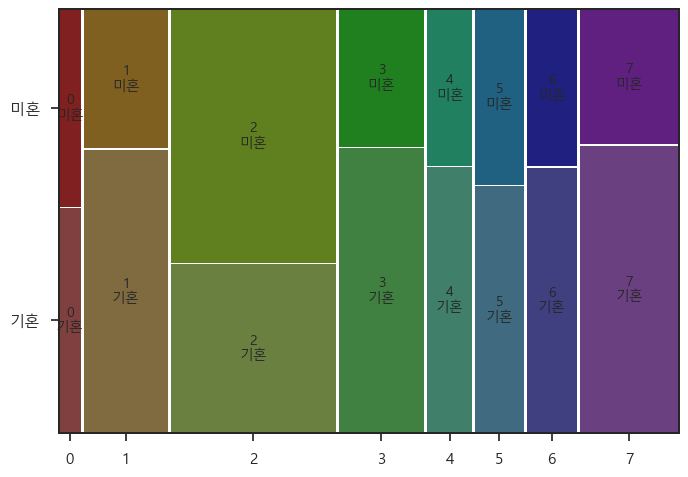

In [233]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '결혼여부'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **10) 월 납입액(수치)**

월 납입액                   
          max  min   mean median
cluster                         
0         350  200 247.09 230.00
1         160   60  86.35  80.00
2         160   60  90.92  80.00
3         160   60  88.49  80.00
4         180   60  91.24  80.00
5         230  110 139.53 130.00
6         160   60  89.35  80.00
7         160   60  93.26  90.00

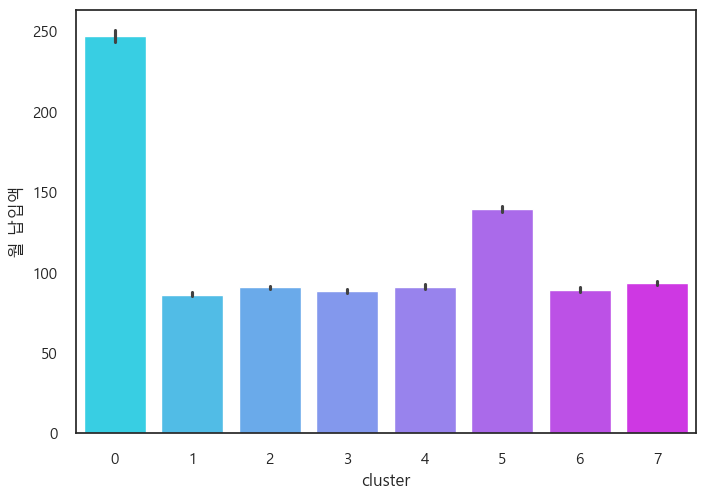

In [237]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '월 납입액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **11) VOC**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
VOC,,,,,,,,,,,,,,,,,,
0,352,1321,2629,1367,712,778,791,1565,9515,0.78,0.79,0.80,0.80,0.80,0.80,0.79,0.79,0.79
1,60,177,365,171,115,103,89,233,1313,0.13,0.11,0.11,0.10,0.13,0.11,0.09,0.12,0.11
2,23,57,134,73,24,51,49,84,495,0.05,0.03,0.04,0.04,0.03,0.05,0.05,0.04,0.04
3,15,64,106,73,27,26,41,53,405,0.03,0.04,0.03,0.04,0.03,0.03,0.04,0.03,0.03
4,1,40,47,22,15,9,27,35,196,0.00,0.02,0.01,0.01,0.02,0.01,0.03,0.02,0.02
5,3,13,22,14,2,6,5,11,76,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


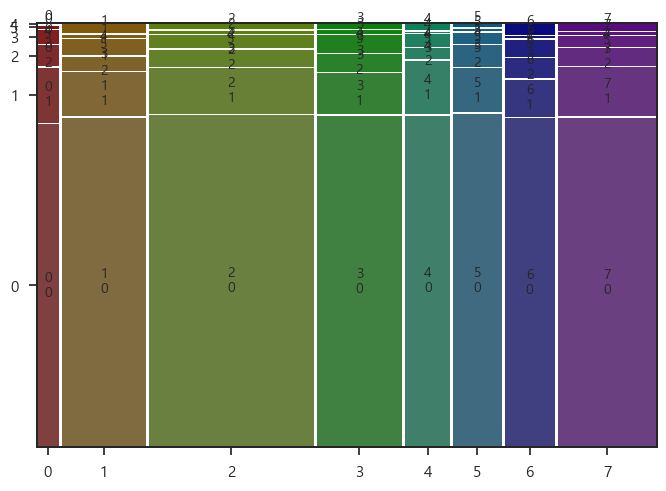

In [242]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = 'VOC'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()


<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **12) 타 상품 보유 현황**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
타 상품 보유 현황,,,,,,,,,,,,,,,,,,
1,184,1291,1121,609,334,348,396,0,4283,0.41,0.77,0.34,0.35,0.37,0.36,0.40,0.00,0.36
2,99,381,837,389,227,272,251,561,3017,0.22,0.23,0.25,0.23,0.25,0.28,0.25,0.28,0.25
3,38,0,439,249,126,118,117,458,1545,0.08,0.00,0.13,0.14,0.14,0.12,0.12,0.23,0.13
4이상,133,0,906,473,208,235,238,962,3155,0.29,0.00,0.27,0.28,0.23,0.24,0.24,0.49,0.26
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


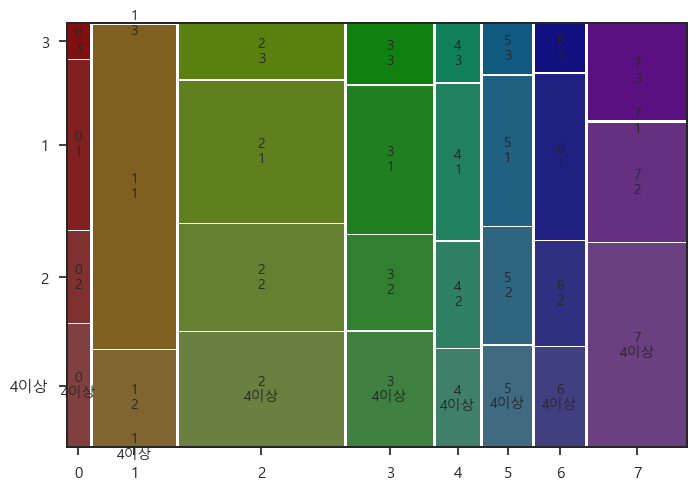

In [246]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '타 상품 보유 현황'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **13) 갱신 인센티브**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
갱신인센티브,,,,,,,,,,,,,,,,,,
설계사독려,109,667,809,751,290,260,348,631,3865,0.24,0.40,0.24,0.44,0.32,0.27,0.35,0.32,0.32
없음,61,256,259,252,116,67,109,218,1338,0.13,0.15,0.08,0.15,0.13,0.07,0.11,0.11,0.11
포인트,77,272,474,256,159,149,151,353,1891,0.17,0.16,0.14,0.15,0.18,0.15,0.15,0.18,0.16
할인,207,477,1761,461,330,497,394,779,4906,0.46,0.28,0.53,0.27,0.37,0.51,0.39,0.39,0.41
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


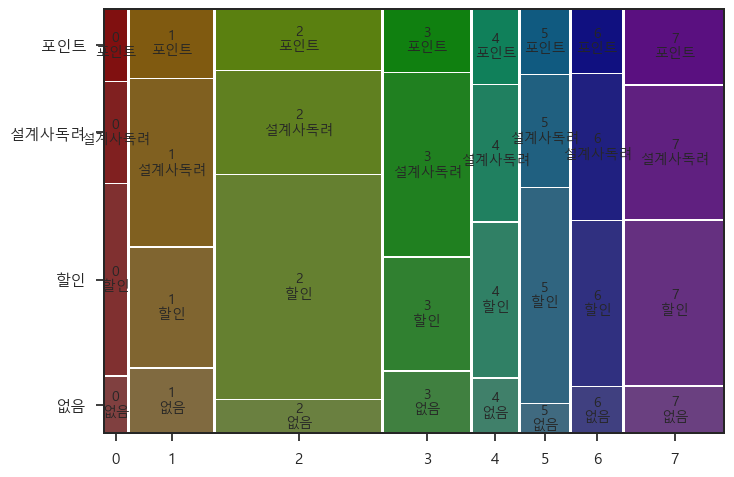

In [251]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신인센티브'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **14) 총 지불 금액(수치)**

총지불금액                            
             max   min       mean     median
cluster                                     
0        3573000  2000 1376094.71 1289000.00
1        1402000  1000  402049.04  392500.00
2        1919000  3000  634234.94  593000.00
3        1040000     0  344751.74  351000.00
4        1912000  2000  380364.25  379000.00
5        2663000  1000  754770.81  688000.00
6        1873000  1000  477547.90  439000.00
7        1765000  1000  448702.68  433000.00

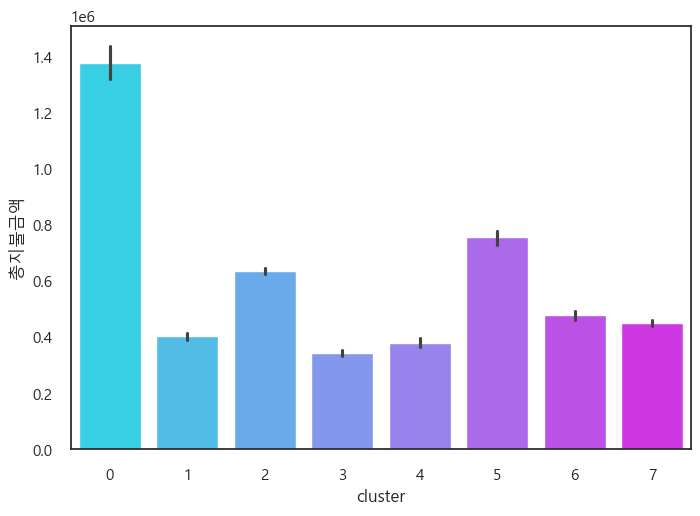

In [255]:
feature = '총지불금액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **15) 자동차**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
자동차,,,,,,,,,,,,,,,,,,
SUV,0,269,720,330,165,193,183,476,2336,0.00,0.16,0.22,0.19,0.18,0.20,0.18,0.24,0.20
고급차,454,0,0,0,0,0,0,0,454,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
스포츠카,0,62,192,83,62,65,56,132,652,0.00,0.04,0.06,0.05,0.07,0.07,0.06,0.07,0.05
일반세단,0,978,1702,896,463,534,511,990,6074,0.00,0.58,0.52,0.52,0.52,0.55,0.51,0.50,0.51
컴팩트카,0,363,689,411,205,181,252,383,2484,0.00,0.22,0.21,0.24,0.23,0.19,0.25,0.19,0.21
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


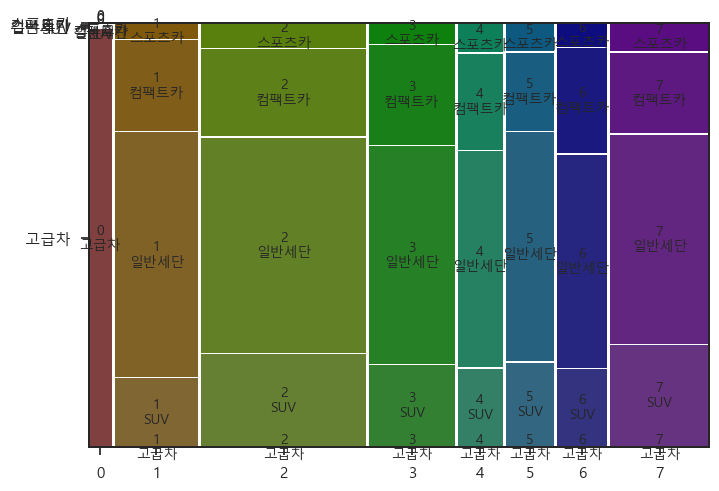

In [260]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '자동차'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

 ### **16) 거주지 사이즈**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
거주지사이즈,,,,,,,,,,,,,,,,,,
대,47,0,0,0,110,86,1002,0,1245,0.10,0.00,0.00,0.00,0.12,0.09,1.00,0.00,0.10
소,107,322,717,367,194,189,0,436,2332,0.24,0.19,0.22,0.21,0.22,0.19,0.00,0.22,0.19
중,300,1350,2586,1353,591,698,0,1545,8423,0.66,0.81,0.78,0.79,0.66,0.72,0.00,0.78,0.70
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


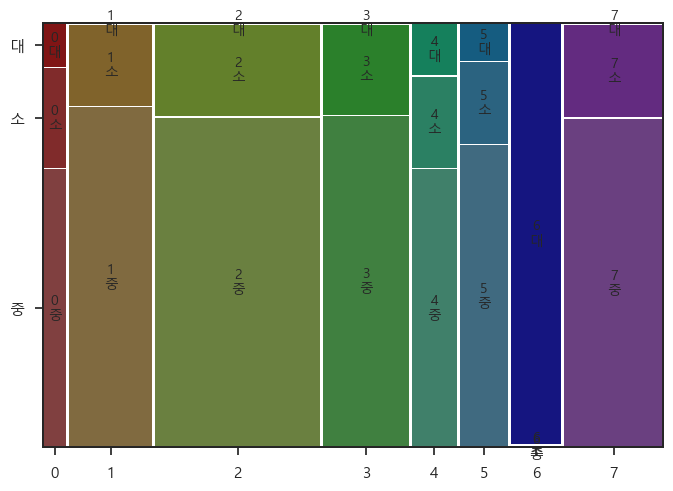

In [264]:
# [문제 39] '거주지사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '거주지사이즈'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **17) 갱신**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
갱신,,,,,,,,,,,,,,,,,,
0,403,1440,2768,1510,750,846,817,1750,10284,0.89,0.86,0.84,0.88,0.84,0.87,0.81,0.88,0.86
1,51,232,535,210,145,127,185,231,1716,0.11,0.14,0.16,0.12,0.16,0.13,0.18,0.12,0.14
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


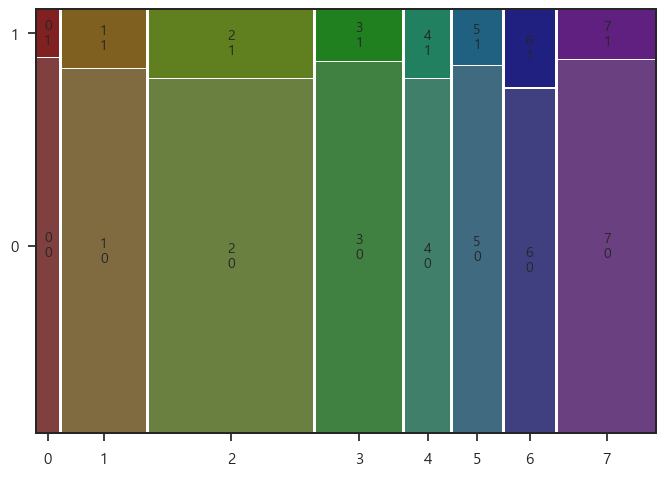

In [268]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **18) 지역**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
지역,,,,,,,,,,,,,,,,,,
도시근교,352,852,3006,572,367,697,641,1085,7572,0.78,0.51,0.91,0.33,0.41,0.72,0.64,0.55,0.63
도심,50,379,145,553,221,106,155,475,2084,0.11,0.23,0.04,0.32,0.25,0.11,0.15,0.24,0.17
시골,52,441,152,595,307,170,206,421,2344,0.12,0.26,0.05,0.35,0.34,0.17,0.21,0.21,0.20
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


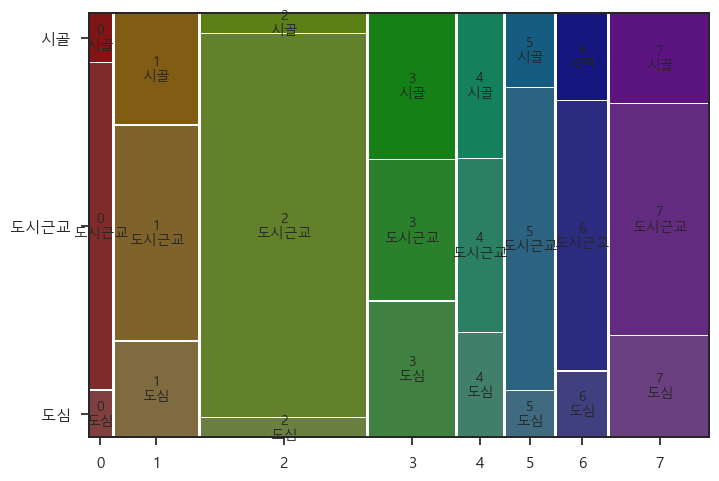

In [273]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '지역'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()


<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **19) 온라인방문빈도**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
온라인방문빈도,,,,,,,,,,,,,,,,,,
비방문,342,1249,2482,1255,676,725,753,1446,8928,0.75,0.75,0.75,0.73,0.76,0.74,0.75,0.73,0.74
자주방문,95,358,683,382,182,211,210,454,2575,0.21,0.21,0.21,0.22,0.20,0.22,0.21,0.23,0.21
종종,17,65,138,83,37,37,39,81,497,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.04
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


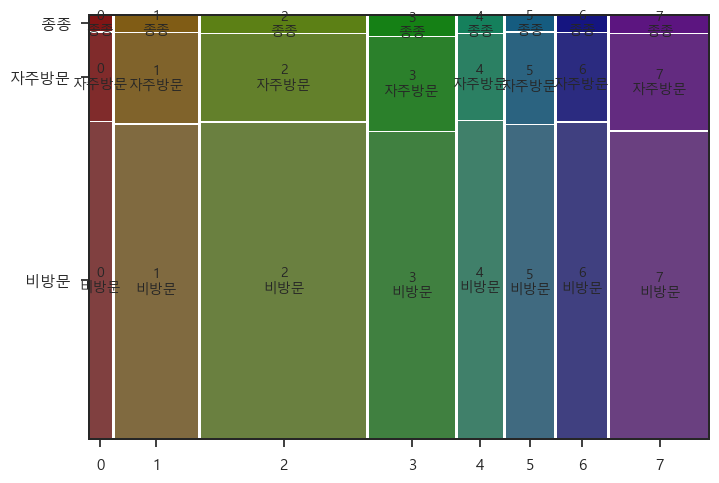

In [279]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '온라인방문빈도'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **20) 판매채널**

cluster,0,1,2,3,4,5,6,7,All,0,1,2,3,4,5,6,7,All
판매채널,,,,,,,,,,,,,,,,,,
대리점,171,679,1323,639,325,348,369,738,4592,0.38,0.41,0.40,0.37,0.36,0.36,0.37,0.37,0.38
인터넷,74,230,502,256,125,151,129,273,1740,0.16,0.14,0.15,0.15,0.14,0.15,0.13,0.14,0.14
자사영업,128,470,864,452,280,279,300,576,3349,0.28,0.28,0.26,0.26,0.31,0.29,0.30,0.29,0.28
콜센터,81,293,614,373,165,195,204,394,2319,0.18,0.17,0.19,0.22,0.18,0.20,0.20,0.20,0.19
All,454,1672,3303,1720,895,973,1002,1981,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


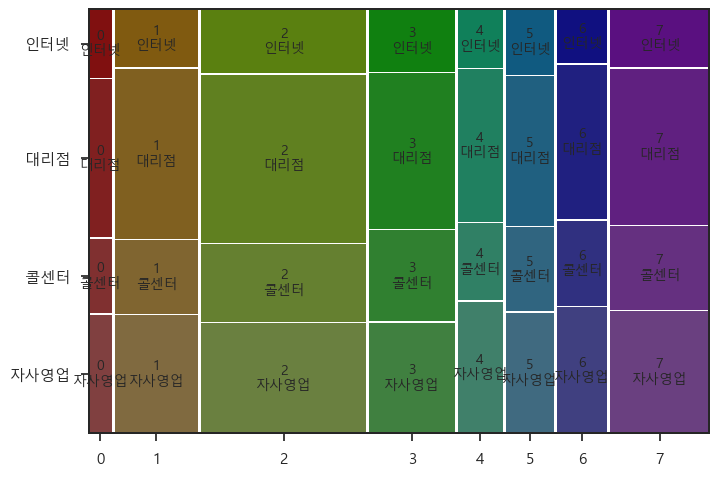

In [284]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '판매채널'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

---------------------------------------------------------------------------------------------
## **(2) 결과 정리**

<font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

<font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!